# Week 9: Edge Detection


### Date : 16th December, 2021

Last week you learned about edge detection algorithms and how these can be used to find
interesting features on an image that can be used in applications such as stereo matching,
3D reconstruction, tracking, localization and recognition.

In [1]:
import numpy as np
import copy
import cv2
from matplotlib import pyplot as plt
import random
from PIL import Image
#to visualize the plots within the notebook
%matplotlib inline
# for making plots looking nicer
plt.style.use('fivethirtyeight')

## Task 1:

We would like to locate	the edges in the image as consistently and accurately as possible. Compute edge maps (i.e., follow the "Simple edge-detector" procedure from the lecture notes) for the image `lighthouse.png` using YOUR OWN:

a) Sobel edge detector (Sobel filters and thresholding)

b) Prewitt edge detector (Prewitt filters and thresholding)

c) An edge detector using derivative of Gaussian filtering in place of the Sobel/Prewitt kernels

d) The built-in Canny edge detector implemented in Matlab


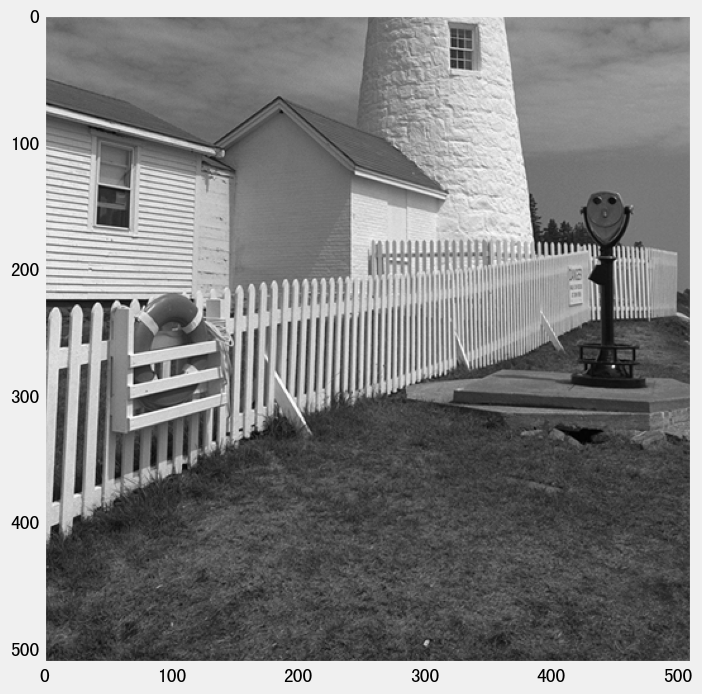

In [2]:
img = cv2.imread('../images/lighthouse.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)
# Show original image
plt.figure(figsize=(8, 8))
plt.imshow(gray_img, "gray")
plt.grid(None)

In [3]:
# Implement your helper functions here. 
# Hint: you can use your implementations in lab week 6
def apply_filter(src_img, kernel):
    assert len(src_img.shape) == 2, print("Dimension mismatch! Please supply gray-scale image only!")
    assert len(kernel.shape) == 2, print("Dimension mismatch! Please supply 2D kernel only!")
    # code here
    h, w = src_img.shape
    kh, kw = kernel.shape

    # padding kernel to same size of image
    padded_kernel = np.zeros_like(src_img)
    kh2, kw2 = kh // 2, kw // 2
    padded_kernel[(h//2-kh2):(h//2+kh2+1), (w//2-kw2):(w//2+kw2+1)] = kernel

    # transfer to Fourier domain
    f_kernel = np.fft.fft2(np.fft.ifftshift(padded_kernel))
    f_image = np.fft.fft2(src_img)
    
    # filtering in the Fourier domain
    f_filtered_image = f_kernel * f_image

    # invert Fourier transform
    filtered_img = np.fft.ifft2(f_filtered_image)
    rst_img = np.abs(filtered_img)
    
    return rst_img

def get_sobel_kernel():
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    return Kx, Ky

def get_prewitt_kernel():
    Kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    Ky = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    return Kx, Ky

def get_gaussian_kernel(k, sigma):
    assert (k % 2 == 1), print("kernal size must be odd number!")
    # code here
    x = np.linspace(-k//2 + 1, k//2, k)
    y = np.linspace(-k//2 + 1, k//2, k)
    X, Y = np.meshgrid(x, y)
    G = (1/(2 * np.pi * sigma**2)) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    G /= np.sum(G)
    
    return G

### 1.a. Sobel filter

In [4]:
# Sobel edge detector (Sobel filters and thresholding)
# code here
sobel_Kx, sobel_Ky = get_sobel_kernel()
Gx_sobel = apply_filter(gray_img, sobel_Kx)
Gy_sobel = apply_filter(gray_img, sobel_Ky)
G_sobel = np.sqrt(Gx_sobel**2 + Gy_sobel**2)
G = G_sobel

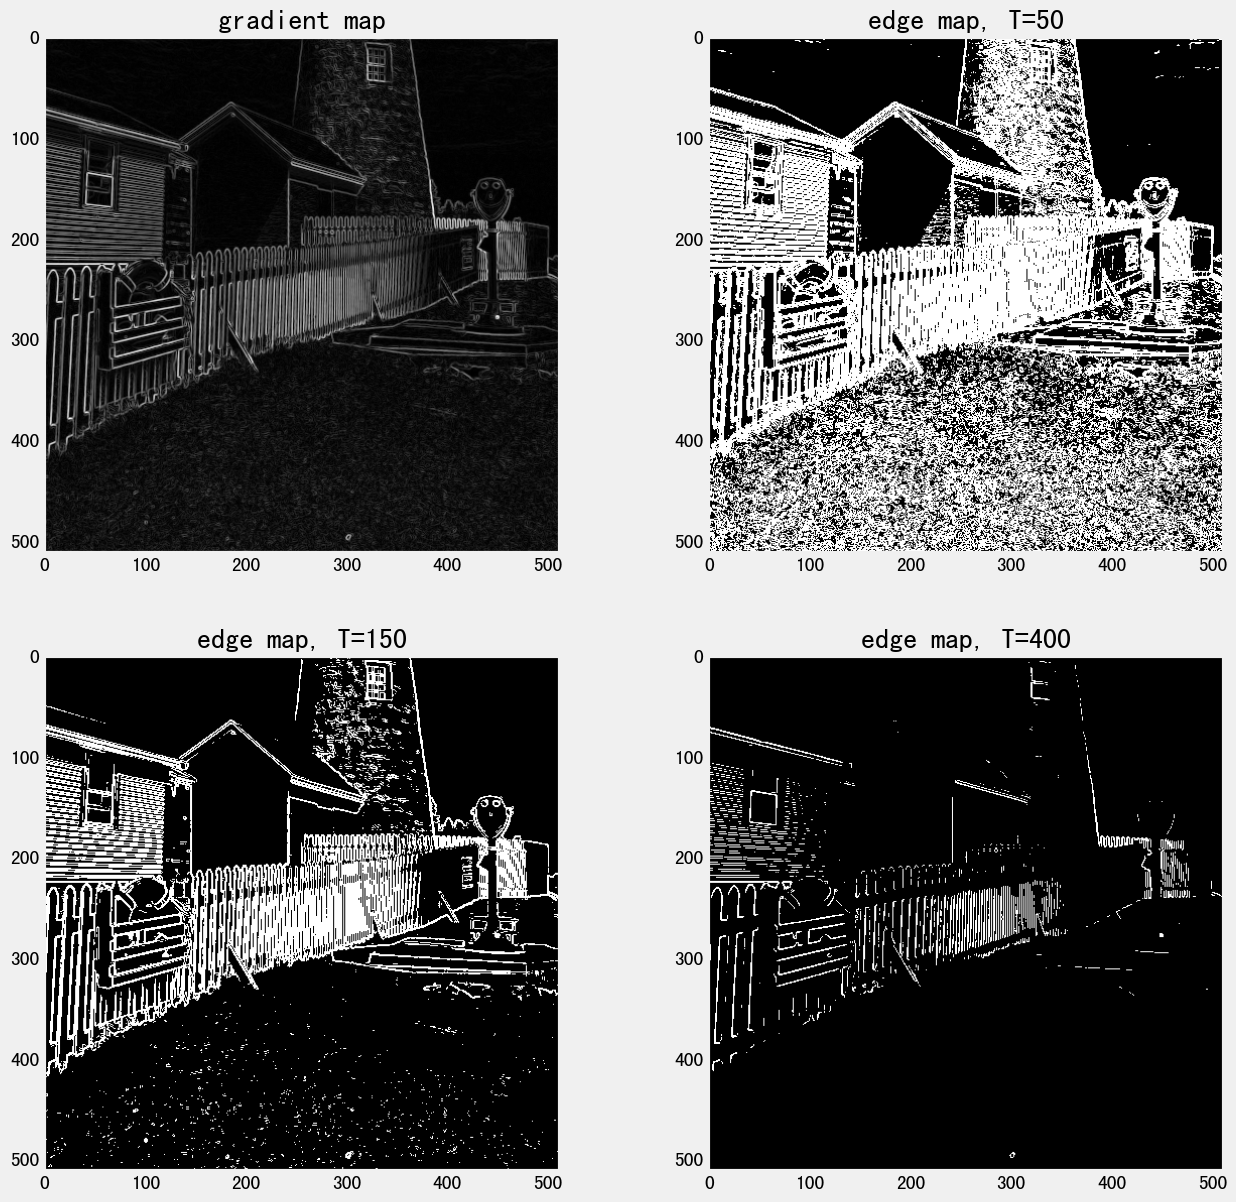

In [5]:
thresholds = [50, 150, 400]
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("gradient map")
plt.imshow(G_sobel, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("edge map, T={:d}".format(thresholds[0]))
plt.imshow((G > thresholds[0]).astype(np.uint8), "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("edge map, T={:d}".format(thresholds[1]))
plt.imshow((G > thresholds[1]).astype(np.uint8), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map, T={:d}".format(thresholds[2]))
plt.imshow((G > thresholds[2]).astype(np.uint8), "gray")
plt.grid(None)

### 1.b. Prewitt filter

In [6]:
# Prewitt edge detector (Prewitt filters and thresholding)
# code here
prewitt_Kx, prewitt_Ky = get_prewitt_kernel()
Gx_prewitt = apply_filter(gray_img, prewitt_Kx)
Gy_prewitt = apply_filter(gray_img, prewitt_Ky)
G_prewitt = np.sqrt(Gx_prewitt**2 + Gy_prewitt**2)

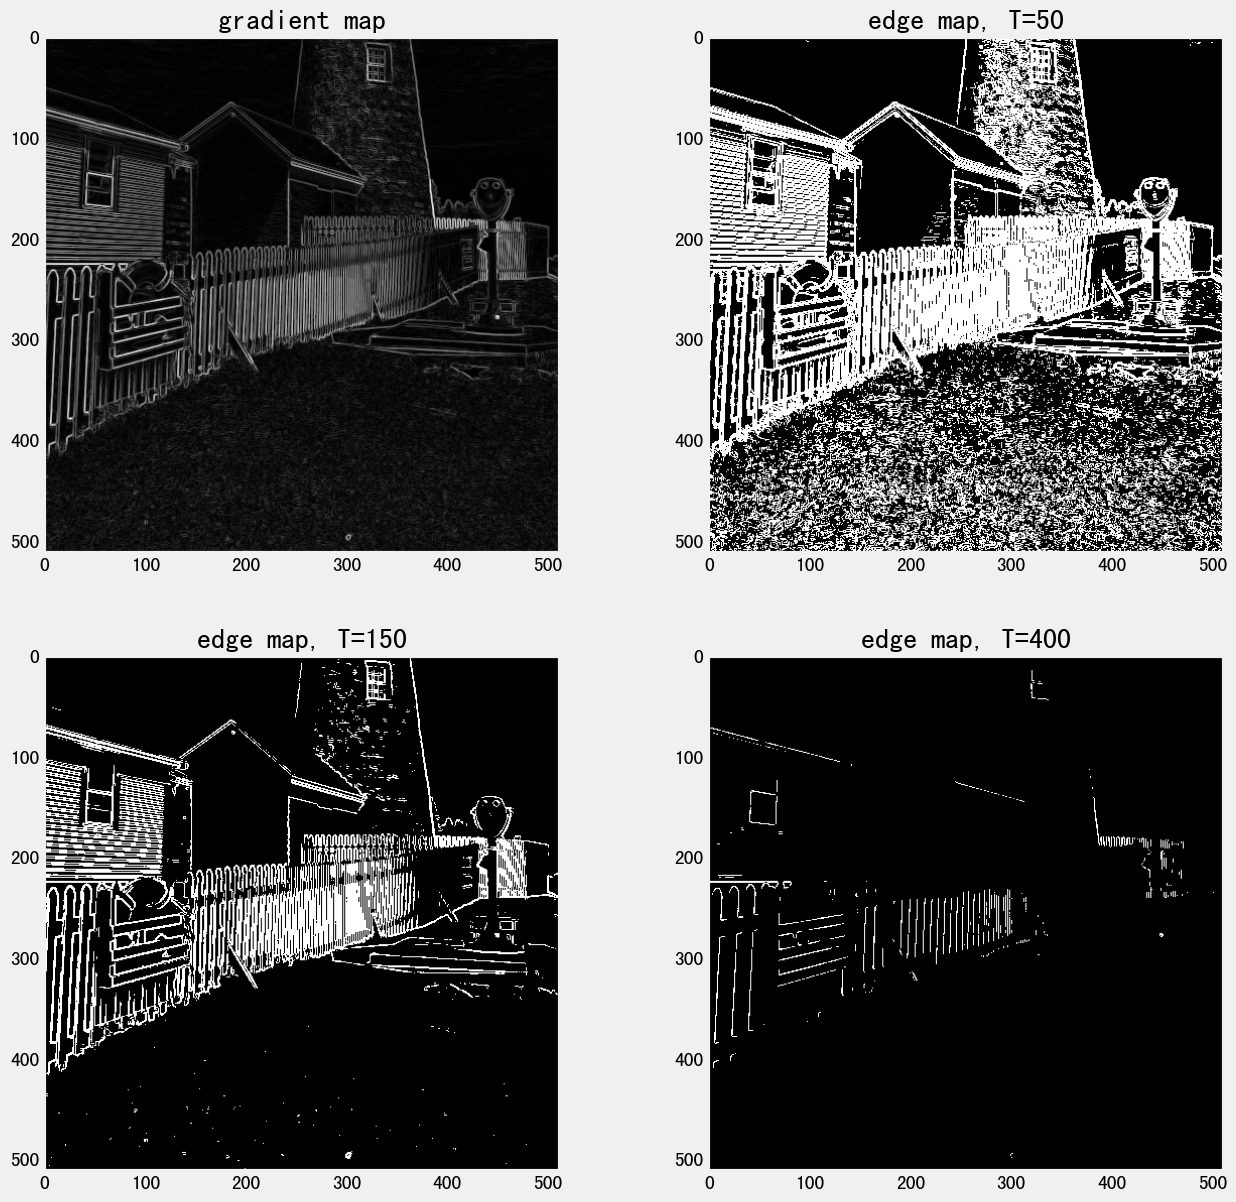

In [7]:
thresholds = [50, 150, 400]
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("gradient map")
plt.imshow(G_prewitt, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("edge map, T={:d}".format(thresholds[0]))
plt.imshow((G_prewitt > thresholds[0]).astype(np.uint8), "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("edge map, T={:d}".format(thresholds[1]))
plt.imshow((G_prewitt > thresholds[1]).astype(np.uint8), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map, T={:d}".format(thresholds[2]))
plt.imshow((G_prewitt > thresholds[2]).astype(np.uint8), "gray")
plt.grid(None)

### 1.c. Gaussian derivative

In [8]:
# first try gaussian kernel size=5, sigma=1.0
# code here
G1 = get_gaussian_kernel(5, 1)
G_gauss_1 = apply_filter(gray_img, G1)
sobel_Kx, sobel_Ky = get_sobel_kernel()
Gx_gauss_1 = apply_filter(G_gauss_1, sobel_Kx)
Gy_gauss_1 = apply_filter(G_gauss_1, sobel_Ky)
G_gauss_1 = np.sqrt(Gx_gauss_1**2 + Gy_gauss_1**2)
# then try gaussian kernel size=5, sigma=5.0
#code here
G5 = get_gaussian_kernel(5, 5)
G_gauss_5 = apply_filter(gray_img, G5)
sobel_Kx, sobel_Ky = get_sobel_kernel()
Gx_gauss_5 = apply_filter(G_gauss_5, sobel_Kx)
Gy_gauss_5 = apply_filter(G_gauss_5, sobel_Ky)
G_gauss_5 = np.sqrt(Gx_gauss_5**2 + Gy_gauss_5**2)

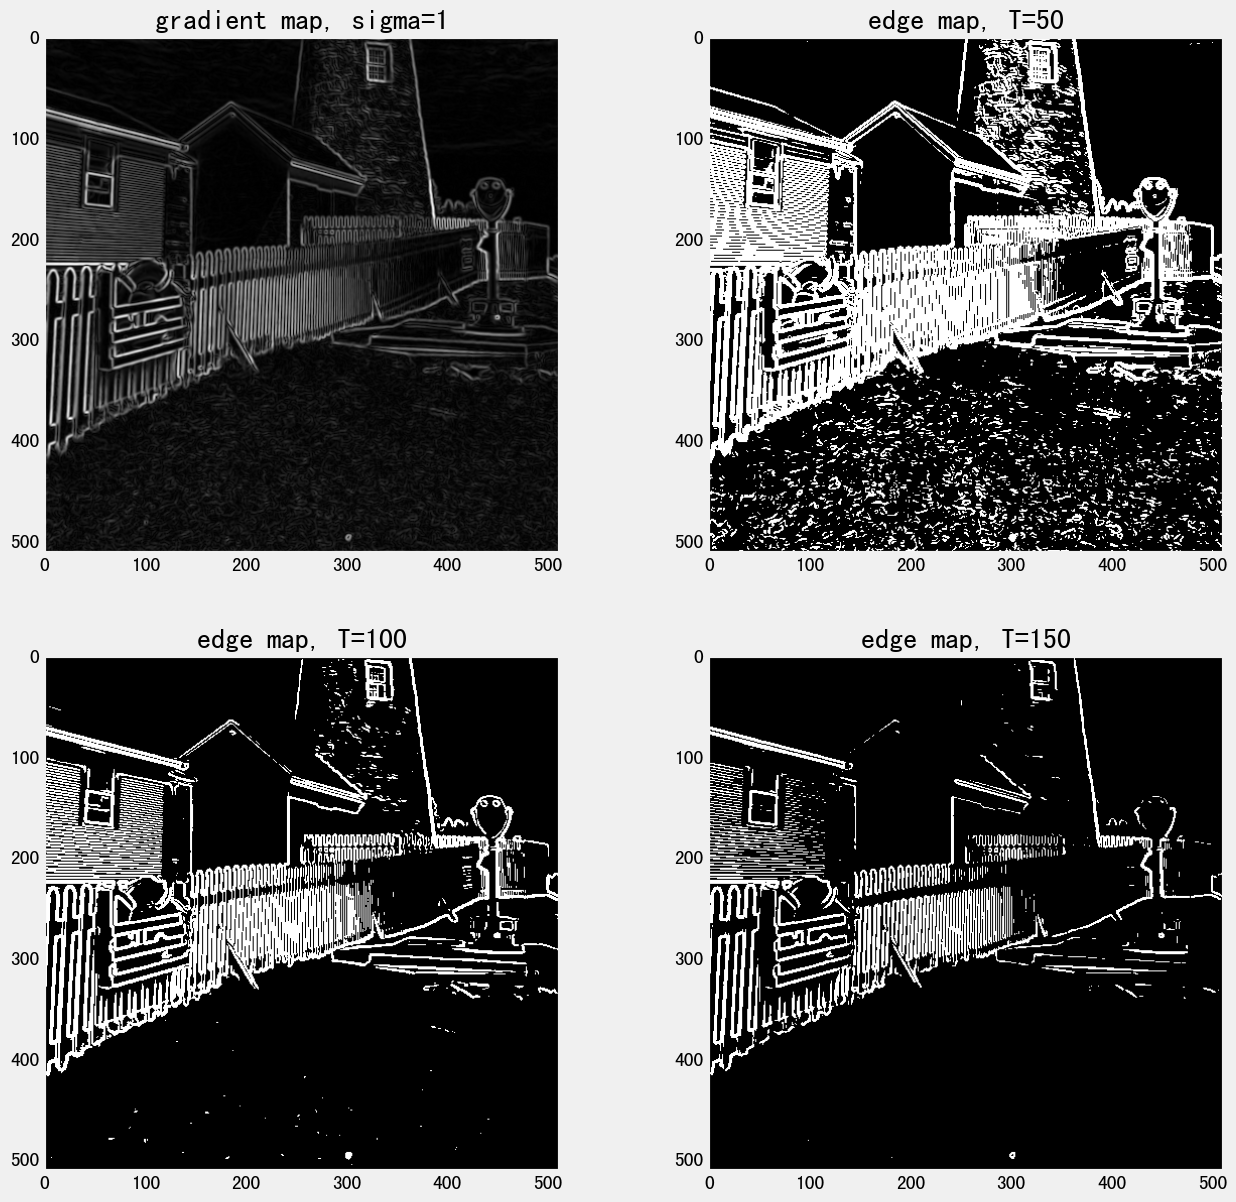

In [9]:
thresholds = [50, 100, 150]
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("gradient map, sigma=1")
plt.imshow(G_gauss_1, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("edge map, T={:d}".format(thresholds[0]))
plt.imshow((G_gauss_1 > thresholds[0]).astype(np.uint8), "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("edge map, T={:d}".format(thresholds[1]))
plt.imshow((G_gauss_1 > thresholds[1]).astype(np.uint8), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map, T={:d}".format(thresholds[2]))
plt.imshow((G_gauss_1 > thresholds[2]).astype(np.uint8), "gray")
plt.grid(None)

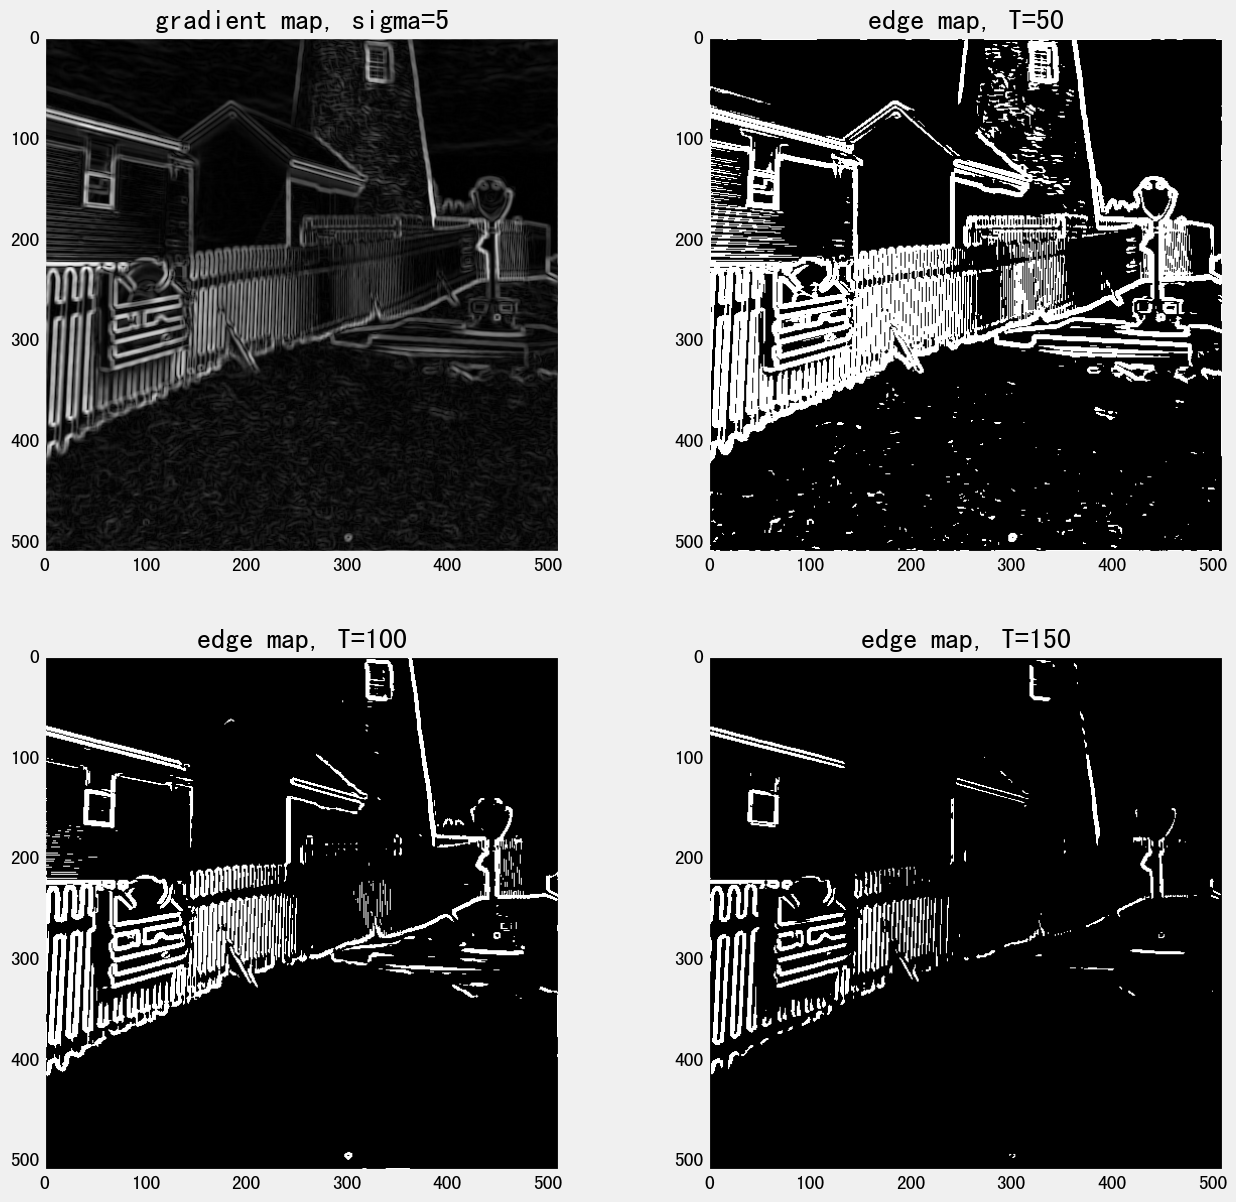

In [10]:
thresholds = [50, 100, 150]
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("gradient map, sigma=5")
plt.imshow(G_gauss_5, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("edge map, T={:d}".format(thresholds[0]))
plt.imshow((G_gauss_5 > thresholds[0]).astype(np.uint8), "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("edge map, T={:d}".format(thresholds[1]))
plt.imshow((G_gauss_5 > thresholds[1]).astype(np.uint8), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map, T={:d}".format(thresholds[2]))
plt.imshow((G_gauss_5 > thresholds[2]).astype(np.uint8), "gray")
plt.grid(None)

### 1.d. The built-in Canny edge detector in OpenCV
You will need to use cv2.Canny() function. Figure out how to use it yourself.

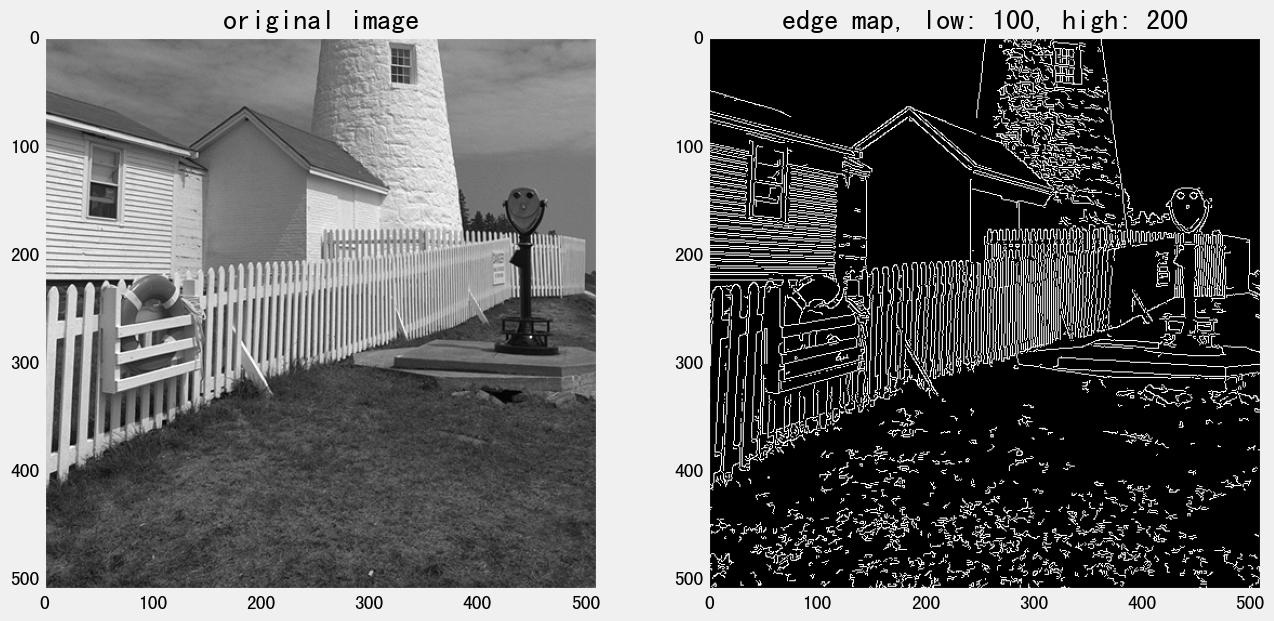

In [11]:
# code here
th_lo = 100
th_hi = 200
edges = cv2.Canny(img, 100, 200)
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(1, 2, 1)
ax1.title.set_text("original image")
plt.imshow(gray_img, "gray")
plt.grid(None)
ax2 = plt.subplot(1, 2, 2)
ax2.title.set_text("edge map, low: {:d}, high: {:d}".format(th_lo, th_hi))
plt.imshow(edges, "gray")
plt.grid(None)

## Task 2: Non-maximal suppression

Implement a non-maximal suppression algorithm and use it on the responses of the filters you used in c) above. Then using fft2 function	plot the phase and magnitude of the suppressed image for different suppression parameters (e.g., threshold or connectivity type). Comment on your findings.

Hint: You can round the gradient angle into 0, 45, 90 and 135 degrees and only check along those for directions.

hint: you may find the OpenCV doc helpful: https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

In [12]:
# Implement your functions here
import copy

def non_maximal_supp(Gx, Gy, G):
    # code here
    # get gradient direction
    angle = np.arctan2(Gy, Gx) * 180 / np.pi
    angle[angle < 0] += 180 
    
    rows, cols = G.shape
    out_gradients = np.zeros_like(G)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            q = 255
            r = 255
            
            # 0 degree
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = G[i, j+1]
                r = G[i, j-1]
            # 45 degree
            elif 22.5 <= angle[i, j] < 67.5:
                q = G[i+1, j-1]
                r = G[i-1, j+1]
            # 90 degree
            elif 67.5 <= angle[i, j] < 112.5:
                q = G[i+1, j]
                r = G[i-1, j]
            # 135 degree
            elif 112.5 <= angle[i, j] < 157.5:
                q = G[i-1, j-1]
                r = G[i+1, j+1]

            # if current pixel is not local maximum, suppress it
            if (G[i, j] >= q) and (G[i, j] >= r):
                out_gradients[i, j] = G[i, j]
            else:
                out_gradients[i, j] = 0
            
    return out_gradients

def hyst_threshold(G, lo, hi, connectivity=8):
    # code here
    # Initialize a binary image to store the final edges
    height, width = G.shape
    edges = np.zeros_like(G, dtype=np.uint8)
    # add strong edges
    edges = (G > hi).astype(np.uint8)
    
    # define neighbors based on connectedness
    if connectivity == 4:
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    elif connectivity == 8:
        neighbors = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]
    else:
        raise ValueError("Connectivity should be 4 or 8.")
        
    # Iterate through all pixels in the image
    for i in range(height):
        for j in range(width):
            # Check if the pixel is on the edge
            if edges[i, j] == 1:
                for di, dj in neighbors:
                    new_i = i + di
                    new_j = j + dj
                    # Check if the neighbor is within the image bounds
                    if 0 <= new_i < height and 0 <= new_j < width:
                        # Check if the neighbor magnitude is above the low threshold
                        if G[new_i, new_j] > lo:
                            edges[new_i, new_j] = 1
    return edges

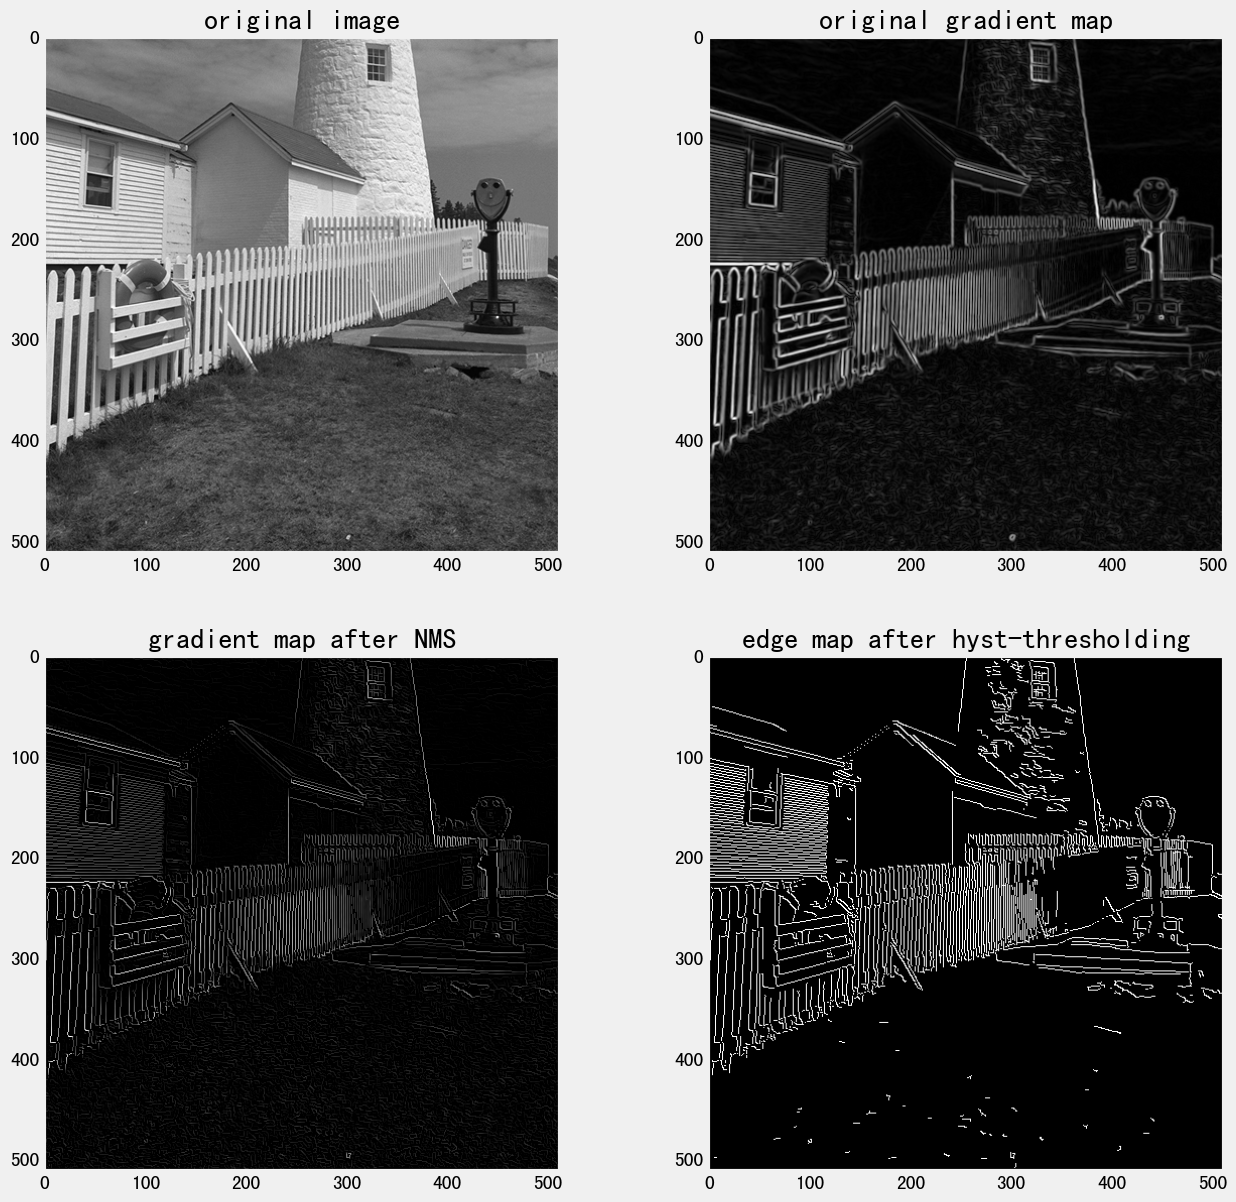

In [13]:
G_nm = non_maximal_supp(Gx_gauss_1, Gy_gauss_1, G_gauss_1)
edge_map = hyst_threshold(G_nm, 50, 100)
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("original image")
plt.imshow(gray_img, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("original gradient map")
plt.imshow(G_gauss_1, "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("gradient map after NMS")
plt.imshow(G_nm, "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map after hyst-thresholding")
plt.imshow(edge_map, "gray")
plt.grid(None)

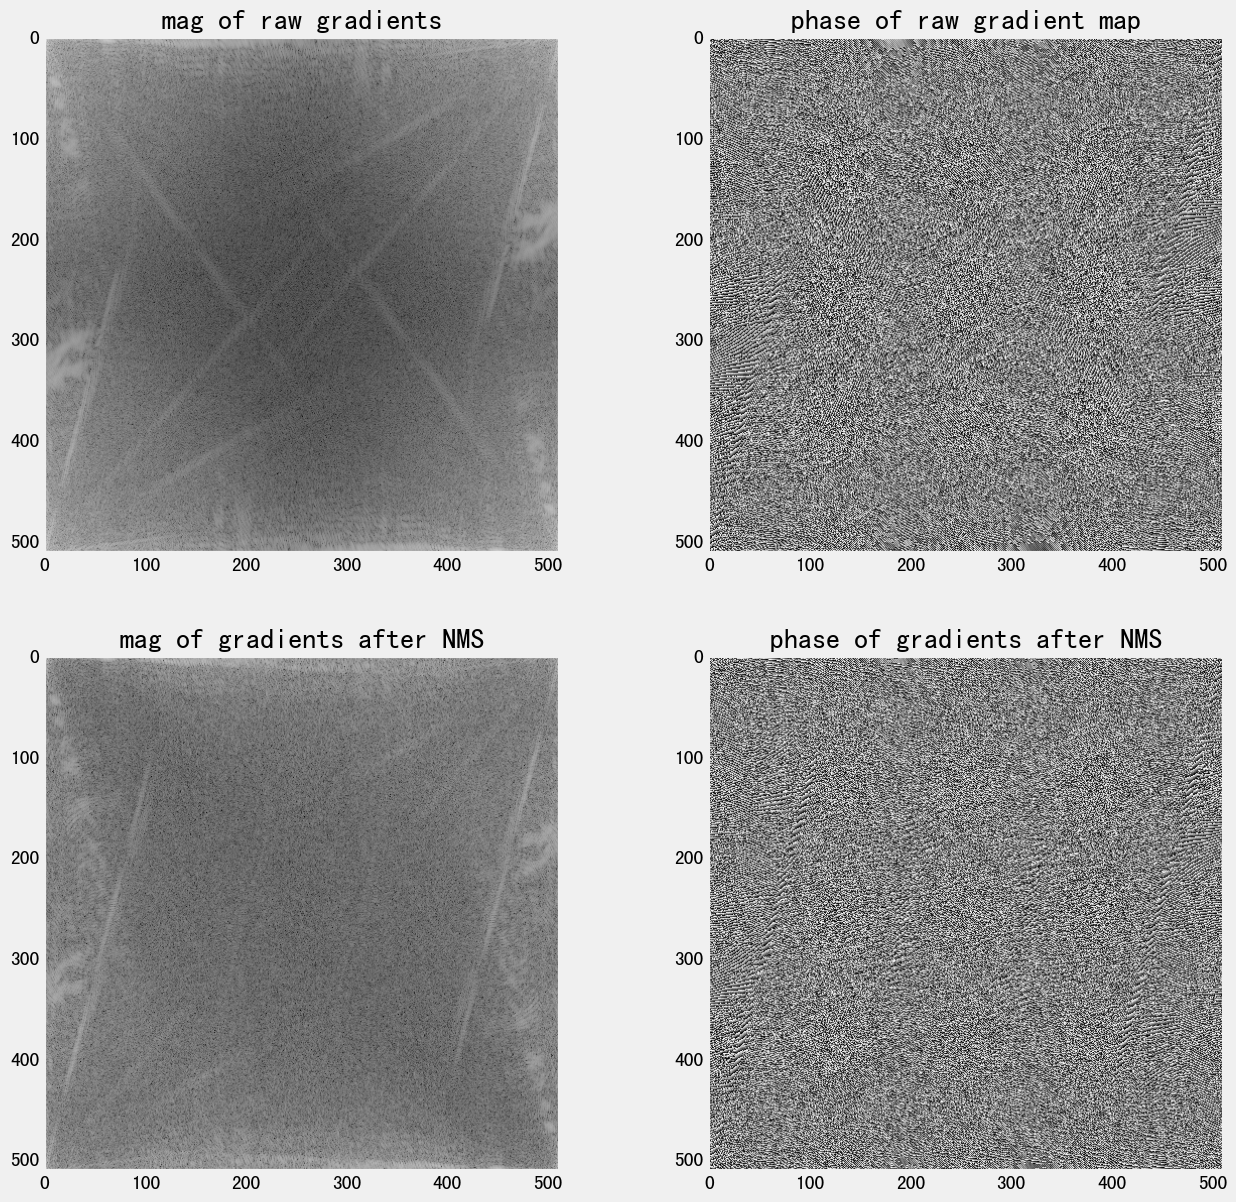

In [14]:
fft_G = np.fft.fft2(G_gauss_1)
G_mag = np.abs(fft_G)
G_phase = np.angle(fft_G)
fft_G_nm = np.fft.fft2(G_nm)
G_nm_mag = np.abs(fft_G_nm)
G_nm_phase = np.angle(fft_G_nm)
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("mag of raw gradients")
plt.imshow(np.log(G_mag), "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("phase of raw gradient map")
plt.imshow(G_phase, "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("mag of gradients after NMS")
plt.imshow(np.log(G_nm_mag), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("phase of gradients after NMS")
plt.imshow(G_nm_phase, "gray")
plt.grid(None)

<mark>**Comment:**</mark><br>
The magnitude of gradient after NMS includes less pattern compare to the magnitude of raw gradients.<br>
Using large threshold or using 4 connectivity instead of 8 will result in a binary image with less edges be detected.